# Data Preparation 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ball_by_ball  = pd.read_csv(r'IPL Ball-by-Ball 2008-2020.csv')
matches  = pd.read_csv(r'IPL Matches 2008-2020.csv')


In [4]:
ball_by_ball.head()
.set_index('id')

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
matches.head()
.set_index('id')

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [6]:
print(ball_by_ball.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [7]:
print(matches.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [8]:
from skimpy import skim

skim(ball_by_ball)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 193468 │ │ int32       │ 9     │                                                          │
│ │ Number of columns │ 18     │ │ string      │ 9     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ id             │   0 │     0 │   760000 │  310000 │  340000 │ 500000 │ 730000 │ 1100000 │ 1200000 │ ▆▇▂▂▅▇ │  │
│ │ inning         │   0 │     0 │      1.5 │     0.5 │       1 │      1 │      1 │       2 │       2 │ ▇    ▇ │  │
│ │ over           │   0 │     0 │      9.2 │     5.7 │       0 │      4 │      9 │      14 │      19 │ ▇▆▆▆▆▇ │  │
│ │ ball           │   0 │     0 │      3.6 │     1.8 │       1 │      2 │      4 │       5 │       9 │ ▇▃▃▇▁  │  │
│ │ batsman_runs   │   0 │     0 │      1.2 │     1.6 │       0 │      0 │      1 │       1 │       6 │ ▇▇▁ ▂▁ │  │
│ │ extra_runs     │   0 │     0 │    0.066 │    0.34 │       0 │      0 │      0 │       0 │       7 │   ▇    │  │
│ │ total_runs     │   0 │     0 │      1.3 │     1.6 │       0 │      0 │      1 │       1 │       7 │  ▇▁ ▁  │  │
│ │ non_boundary   │   0 │     0 │  8.3e-05 │  0.0091 │       0 │      0 │      0 │       0 │       1 │   ▇    │  │
│ │ is_wicket      │   0 │     0 │    0.049 │    0.22 │       0 │      0 │      0 │       0 │       1 │   ▇    │  │
│ └────────────────┴─────┴───────┴──────────┴─────────┴─────────┴────────┴────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA           ┃ NA %       ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ batsman                       │            0 │          0 │                      2.1 │              396874 │  │
│ │ non_striker                   │            0 │          0 │                      2.1 │              396904 │  │
│ │ bowler                        │            0 │          0 │                        2 │              394109 │  │
│ │ dismissal_kind                │       183973 │      95.09 │                    0.057 │               10953 │  │
│ │ player_dismissed              │       183973 │      95.09 │                      0.1 │               19455 │  │
│ │ fielder                       │       186684 │      96.49 │                    0.075 │               14521 │  │
│ │ extras_type                   │       183235 │      94.71 │                    0.053 │               10233 │  │
│ │ batting_team                  │            0 │          0 │                      2.5 │              481335 │  │
│ │ bowling_team                  │          191 │      

## Observation

I will drop  dismissal_kind , player_dismissed , fielder , extras_type  since the percentage of null values  is very high..                                     

In [9]:
from skimpy import skim

skim(matches)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 816    │ │ string      │ 14    │                                                          │
│ │ Number of columns │ 17     │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ id              │   0 │     0 │  760000 │  310000 │  340000 │ 500000 │ 730000 │ 1100000 │ 1200000 │ ▆▇▂▂▅▆ │  │
│ │ neutral_venue   │   0 │     0 │   0.094 │    0.29 │       0 │      0 │      0 │       0 │       1 │ ▇    ▁ │  │
│ │ result_margin   │  17 │  2.08 │      17 │      22 │       1 │      6 │      8 │      20 │     150 │   ▇▁   │  │
│ └─────────────────┴─────┴───────┴─────────┴─────────┴─────────┴────────┴────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                    ┃ NA      ┃ NA %        ┃ words per row             ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ city                           │      13 │        1.59 │                         1 │                   849 │  │
│ │ date                           │       0 │           0 │                         1 │                   816 │  │
│ │ player_of_match                │       4 │        0.49 │                         2 │                  1660 │  │
│ │ venue                          │       0 │           0 │                       3.4 │                  2765 │  │
│ │ team1                          │       0 │           0 │                       2.5 │                  2042 │  │
│ │ team2                          │       0 │           0 │                       2.5 │                  2021 │  │
│ │ toss_winner                    │       0 │           0 │                       2.5 │                  2020 │  │
│ │ toss_decision                  │       0 │           0 │                         1 │                   816 │  │
│ │ winner                         │       4 │        0.49 │                       2.5 │                  2029 │  │
│ │ result                         │       4 │        0.49 │                         1 │                   812 │  │
│ │ eliminator                     │       4 │        0.49 │                         1 │                   812 │  │
│ │ method                         │     797 │       97.67 │                     0.023 │                    19 │  │
│ │ umpire1                        │       0 │           0 │                         2 │                  1646 │  │
│ │ umpire2                        │       0 │          

## Observation

I will drop method   since the percentage of null values is very high..

## Dropping uncessary columns:

In [10]:
ball_by_ball_u = ball_by_ball.drop(columns=['dismissal_kind' , 'player_dismissed' , 'fielder' , 'extras_type'], axis=1)
matches_u = matches.drop(columns=['method'], axis=1)


## checking for duplicates

In [11]:
matches_u.duplicated().sum()


0

In [12]:
ball_by_ball_u.duplicated().sum()


1

## Dropping duplicates

In [13]:
ball_by_ball_u.drop_duplicates(inplace=True)


In [14]:
ball_by_ball_u.duplicated().sum()


0

## checking percentage of null values

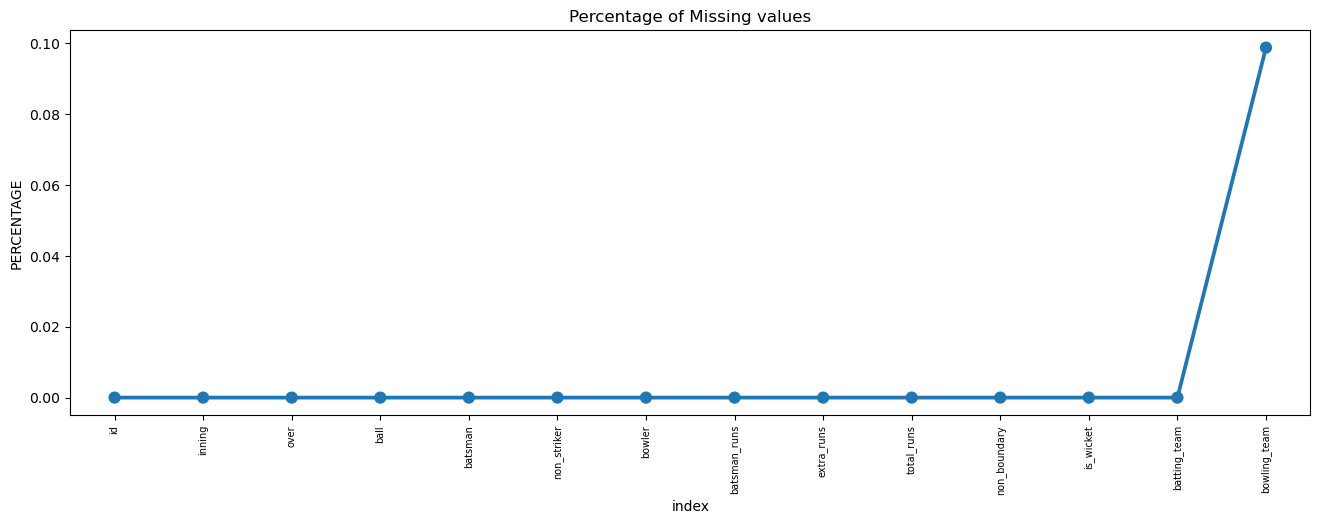

In [15]:
missing = pd.DataFrame((ball_by_ball_u.isnull().sum()) * 100 / ball_by_ball_u.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## Dropping null values

In [16]:
ball_by_ball_u.dropna(inplace=True)

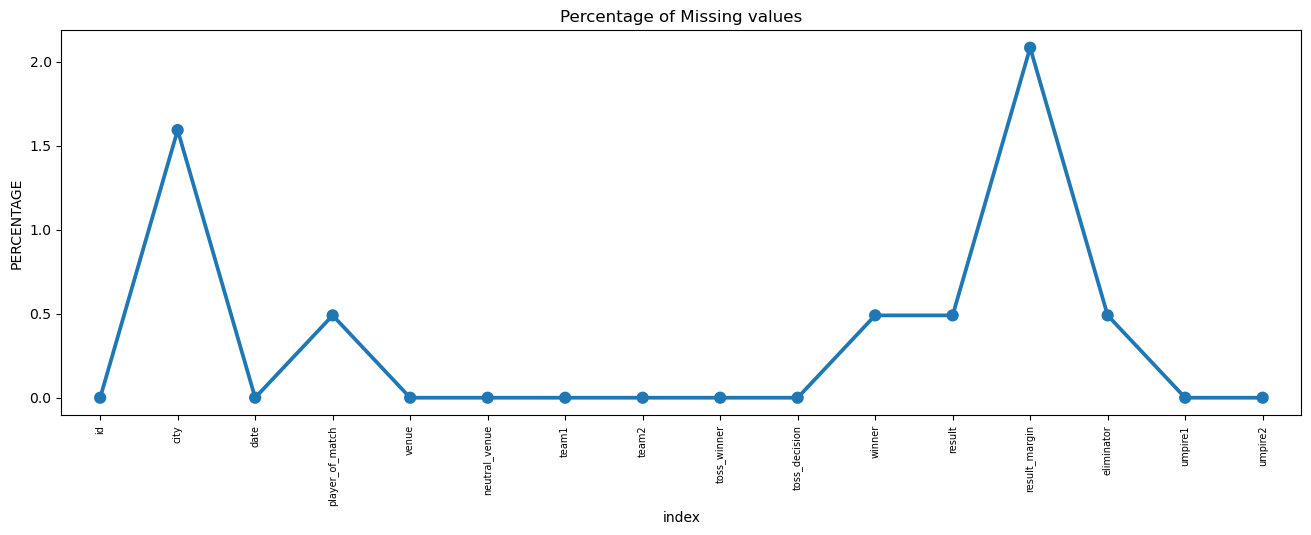

In [17]:
missing = pd.DataFrame((matches_u.isnull().sum()) * 100 / matches_u.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [18]:
matches_u.ffill(inplace=True)



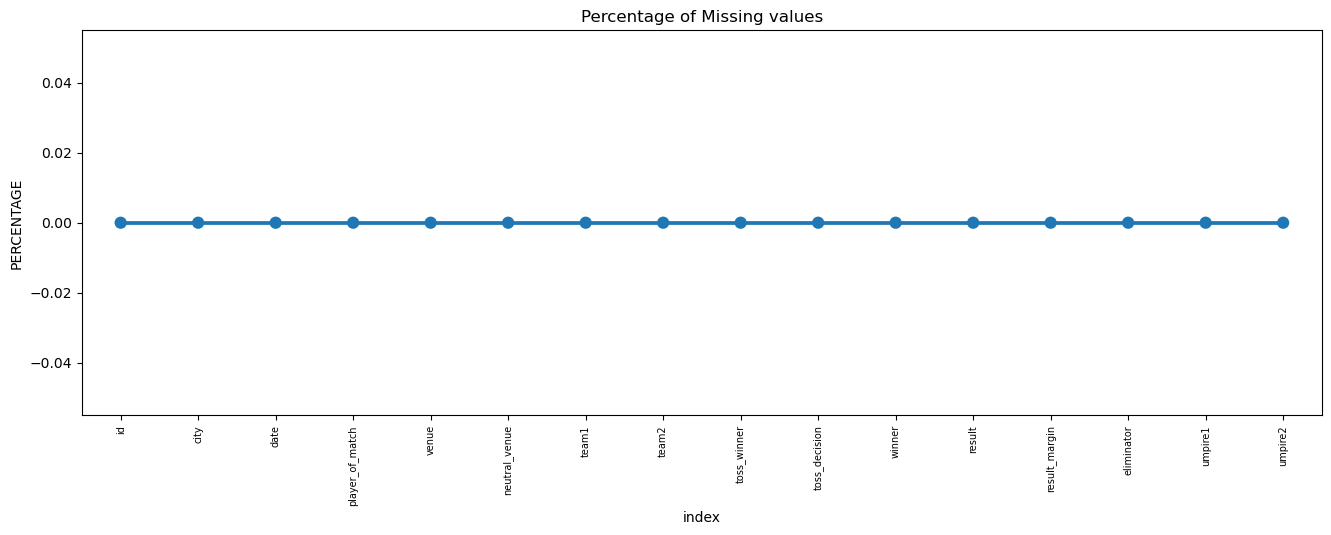

In [19]:
missing = pd.DataFrame((matches_u.isnull().sum()) * 100 / matches_u.shape[0]).reset_index()
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## Save the cleaned dataframes

In [20]:
matches_u.to_csv("matches2.csv", index=False)
ball_by_ball_u.to_csv("ball_by_ball2.csv", index=False)
